In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential , Model
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


from tensorflow.keras.applications import ResNet50V2

In [2]:
dir_train = "train"
dir_test = "test"

train_datagen = ImageDataGenerator(  rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',)

test_datagen=ImageDataGenerator(rescale=1/255,)
                                     

train_generator = train_datagen.flow_from_directory(
    dir_train,
    class_mode="categorical",
    target_size=(224,224),
    color_mode='rgb', 
    shuffle=True,
    batch_size=64,
    subset='training',)



test_generator = test_datagen.flow_from_directory(
    dir_test,
    class_mode="categorical",
    target_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    batch_size=64) # set as validation data


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
base_model =  tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )
base_model.summary()
x=0
for layer in base_model.layers:
    x=x+1
print(x)

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [4]:
# Freezing all layers except last 50

base_model.trainable = True

for layer in base_model.layers:
    layer.trainable = False

In [5]:
def ResNet50V2_Layer():

    model = Sequential([
                      base_model,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [7]:
ResNet50V2_Model = ResNet50V2_Layer()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x = 0
for layer in ResNet50V2_Model.layers:
    x=x+1
    
print(x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [8]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

In [9]:
model2 = ResNet50V2_Model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=test_generator,callbacks = [callbacks])

Epoch 1/50
449/449 [==============================] - 523s 1s/step - loss: 1.4719 - accuracy: 0.4804 - val_loss: 1.1611 - val_accuracy: 0.5687 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - 463s 1s/step - loss: 1.2191 - accuracy: 0.5590 - val_loss: 5591.3018 - val_accuracy: 0.2473 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - 452s 1s/step - loss: 1.2212 - accuracy: 0.5653 - val_loss: 1.0702 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - 538s 1s/step - loss: 1.1207 - accuracy: 0.5985 - val_loss: 1.2819 - val_accuracy: 0.5843 - lr: 0.0010
Epoch 5/50
449/449 [==============================] - ETA: 0s - loss: 1.0610 - accuracy: 0.6194
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
449/449 [==============================] - 510s 1s/step - loss: 1.0610 - accuracy: 0.6194 - val_loss: 2.4873 - val_accuracy: 0.4843 - lr: 0.0010
Epoch 6/50
449/449 [==============================] - 5

Epoch 40/50
449/449 [==============================] - ETA: 0s - loss: 0.7314 - accuracy: 0.7418
Epoch 40: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
449/449 [==============================] - 447s 995ms/step - loss: 0.7314 - accuracy: 0.7418 - val_loss: 0.9018 - val_accuracy: 0.6822 - lr: 4.0960e-12
Epoch 41/50
449/449 [==============================] - 452s 1s/step - loss: 0.7269 - accuracy: 0.7419 - val_loss: 0.9037 - val_accuracy: 0.6822 - lr: 8.1920e-13
Epoch 42/50
449/449 [==============================] - ETA: 0s - loss: 0.7209 - accuracy: 0.7452Restoring model weights from the end of the best epoch: 35.

Epoch 42: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
449/449 [==============================] - 457s 1s/step - loss: 0.7209 - accuracy: 0.7452 - val_loss: 0.9007 - val_accuracy: 0.6815 - lr: 8.1920e-13
Epoch 42: early stopping


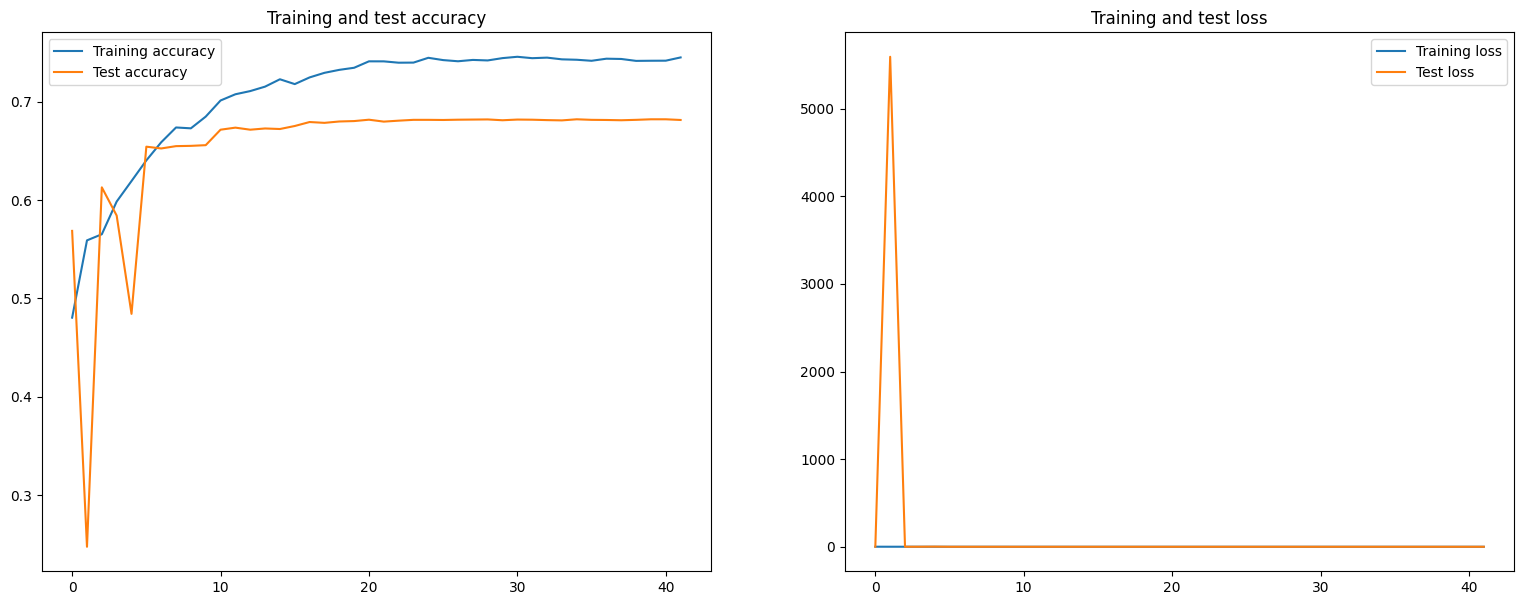

In [10]:
#show the epoch graph
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(model2.epoch, model2.history['accuracy'], label='Training accuracy')
plt.plot(model2.epoch, model2.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(model2.epoch, model2.history['loss'], label='Training loss')
plt.plot(model2.epoch, model2.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

C:\Users\STEVE\AppData\Local\Temp\ipykernel_6912\544691548.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = ResNet50V2_Model.predict_generator(test_generator)


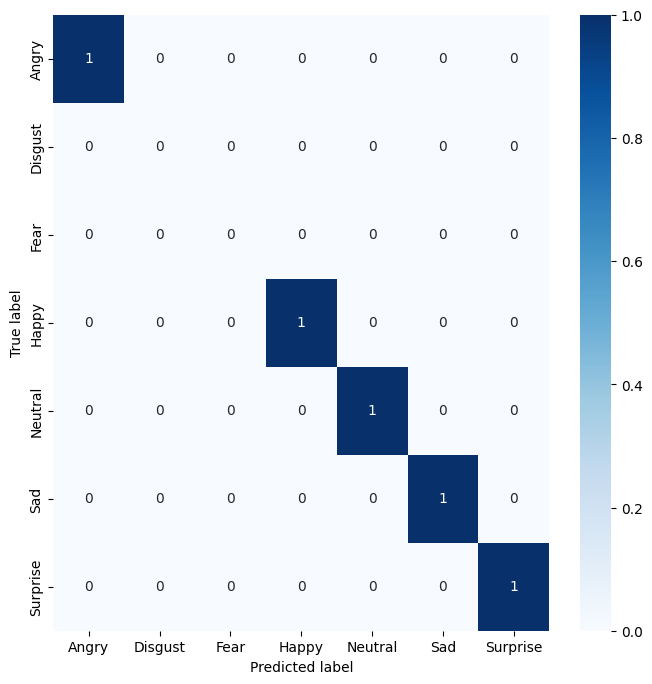

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the predicted labels for the validation set
y_pred = ResNet50V2_Model.predict_generator(test_generator)

# Convert the predicted probabilities to predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = test_generator.classes

# Replace the class labels below with the CK+ class labels
class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Normalize the confusion matrix by row to show the fraction of correct predictions for each class
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_bulat = np.round(cm_norm).astype(int)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(cm_bulat, annot=True,cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Get the predicted labels for the validation set
y_pred = ResNet50V2_Model.predict_generator(test_generator)

# Convert the predicted probabilities to predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = test_generator.classes

# Replace the class labels below with the CK+ class labels
class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

# Print the classification report
print(classification_report(y_true, y_pred_labels, target_names=class_labels))


C:\Users\STEVE\AppData\Local\Temp\ipykernel_6912\3534361967.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = ResNet50V2_Model.predict_generator(test_generator)


              precision    recall  f1-score   support

       Angry       0.61      0.63      0.62       958
     Disgust       0.68      0.50      0.57       111
        Fear       0.55      0.43      0.48      1024
       Happy       0.86      0.89      0.87      1774
     Neutral       0.62      0.70      0.66      1233
         Sad       0.57      0.57      0.57      1247
    Surprise       0.79      0.78      0.78       831

    accuracy                           0.68      7178
   macro avg       0.67      0.64      0.65      7178
weighted avg       0.68      0.68      0.68      7178



In [13]:
score = ResNet50V2_Model.evaluate(train_generator)
#print(score[1]*100)

449/449 [==============================] - 387s 861ms/step - loss: 0.6577 - accuracy: 0.7600


In [14]:
score = ResNet50V2_Model.evaluate(test_generator)

113/113 [==============================] - 47s 415ms/step - loss: 0.9014 - accuracy: 0.6822


In [17]:
 ResNet50V2_Model.save('resnetv2_1.h5')

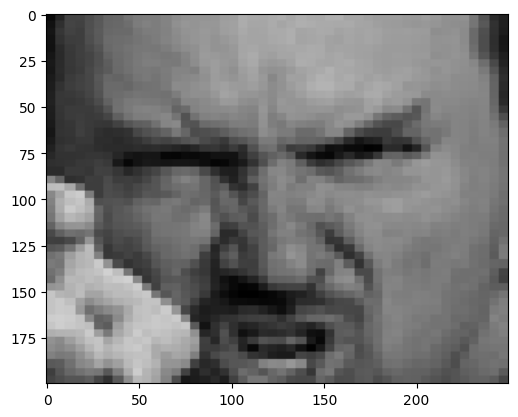

(200, 250, 3)
(1, 200, 250, 3)


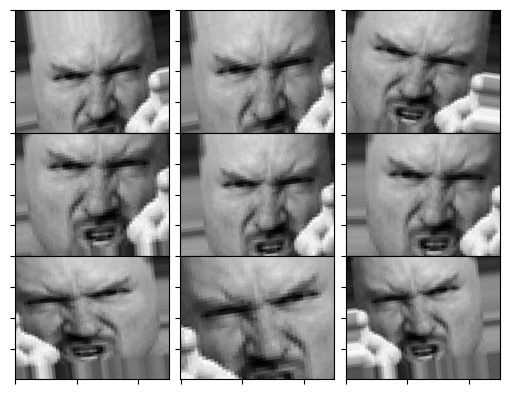

In [18]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt


path = "train/angry/Training_332231.jpg"
image = load_img(path, target_size=(200, 250))
plt.imshow(image)
plt.show()

img_arr = img_to_array(image)
print(img_arr.shape) 
 
img_arr = img_arr.reshape((1,)+img_arr.shape)
print(img_arr.shape)

datagen = ImageDataGenerator(  rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',)

n = 9
imgs = []
for i in datagen.flow(img_arr, batch_size=1):
    imgs.append(array_to_img(i[0], scale=True))
    if(len(imgs) == n):
        break
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
for i in range(0, n):
    plt.subplot(3, 3, i + 1) 
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.imshow(imgs[i])
    
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = ResNet50V2_Model.predict(test_generator)  # X_test adalah data test yang akan diprediksi
y_pred = np.argmax(y_pred, axis=1)  # Mengambil indeks kelas dengan probabilitas tertinggi

# Get the true labels for the validation set
y_true = test_generator.classes

# Replace the class labels below with the CK+ class labels
class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4', 'Actual 5', 'Actual 6'],
                     columns=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4',
                              'Predicted 5', 'Predicted 6'])
print(df_cm)


113/113 [==============================] - 47s 420ms/step
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0          605           14           76           35           96   
Actual 1           35           55            6            4            3   
Actual 2          127            1          442           36          104   
Actual 3           32            1           21         1570           87   
Actual 4           63            4           51           75          865   
Actual 5          119            5          124           60          215   
Actual 6           15            1           82           42           34   

          Predicted 5  Predicted 6  
Actual 0          116           16  
Actual 1            7            1  
Actual 2          215           99  
Actual 3           29           34  
Actual 4          163           12  
Actual 5          714           10  
Actual 6           11          646  
